In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K

from sklearn.model_selection import KFold
from keras.models import Model, Sequential
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [86]:
from ipynb.fs.full.DatasetManage import read_and_store_data
from ipynb.fs.full.FeatureExtraction import feature_extraction
from ipynb.fs.full.ClassificationPerformanceIndexes import classificationPerformanceIndexes, printClassificationPerformanceIndexes
from ipynb.fs.full.ClassificationMethods import CompleteLSTM

Parameter

In [87]:
perfInd = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'MCC', 'Kappa', 'Time']
channels = ['FP1-F7', 'F7-T7','T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'seizure']

dataset = 'CHB_MIT'
csvImportFile = 'CHB.csv'
csvExportFile = 'CHB.csv'
sample_rate = 256
time_window = 2
step = time_window * sample_rate

test_ratio = 0.3

pca_tolerance = 0.9

undersampling_rate = 0.2

oversampling_neighbors = 11

k_fold = 5

csvAverageFile = 'Features.csv'

batch = 10
epochs = 100
dropout_percentage = 0.2
loss_function = 'mean_squared_error'
metric = 'accuracy'

Create Training and Test Data

In [88]:
def trainTestData (features, test_ratio, k_fold, perfInd):
    x = features.loc[:, features.columns != 'seizure']
    y = features['seizure']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_ratio, shuffle = True)
    results = pd.DataFrame(columns = perfInd)
    kf = KFold(n_splits = k_fold, shuffle = True)
    return x_train, x_test, y_train, y_test, results, kf

Read and Store Data

In [89]:
print('Reading data from', csvImportFile)
df = pd.read_csv(csvImportFile, delimiter = ',', header = 0)

Reading data from CHB.csv


Feature Extraction 

In [90]:
# ft = feature_extraction(df, sample_rate, step, pca_tolerance, undersampling_rate, oversampling_neighbors)

Train and Test process

In [91]:
ft = pd.read_csv(csvAverageFile, delimiter = ',', header = 0)

In [92]:
x_train, x_test, y_train, y_test, results, kf = trainTestData (ft, test_ratio, k_fold, perfInd)

x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
y_train = y_train.values.astype(int)
x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
y_test = y_test.values.astype(int)

In [93]:
model = Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(None, x_train.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))


history = model.fit(x_train,
                    steps_per_epoch=500,
                    epochs=2)


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

1D Convolutional Model

In [ ]:
# Definizione dell'architettura della rete neurale

num_classes = 2
input_channels = 87

model = tf.keras.Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(1, input_channels)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compilazione del modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.compile(optimizer='rmsprop', loss='mae')

# Training 

# X_train = X_train.reshape(-1, input_length, input_channels)

num_epochs = 20
batch_size = 8
model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size)

# Evaluation of the model

# X_test = X_test.reshape(-1, input_length, input_channels)
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)

# Utilizzo del modello per effettuare predizioni
predictions = model.predict(x_test)


1D CN

In [ ]:
model = Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(None, x_train.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')
history = model.fit(x_train,
                    y_train,
                    steps_per_epoch=350,
                    epochs=20)

GRU

1 layer

Epoch 1/180
63/63 [==============================] - 3s 11ms/step - loss: 0.5755 - accuracy: 0.7572 - val_loss: 0.5147 - val_accuracy: 0.8861
Epoch 2/180
63/63 [==============================] - 0s 4ms/step - loss: 0.4952 - accuracy: 0.8754 - val_loss: 0.4534 - val_accuracy: 0.8987
Epoch 3/180
63/63 [==============================] - 0s 4ms/step - loss: 0.4323 - accuracy: 0.8978 - val_loss: 0.4037 - val_accuracy: 0.9114
Epoch 4/180
63/63 [==============================] - 0s 4ms/step - loss: 0.3793 - accuracy: 0.9105 - val_loss: 0.3618 - val_accuracy: 0.9114
Epoch 5/180
63/63 [==============================] - 0s 4ms/step - loss: 0.3367 - accuracy: 0.9201 - val_loss: 0.3280 - val_accuracy: 0.9114
Epoch 6/180
63/63 [==============================] - 0s 4ms/step - loss: 0.3025 - accuracy: 0.9265 - val_loss: 0.3010 - val_accuracy: 0.9114
Epoch 7/180
63/63 [==============================] - 0s 4ms/step - loss: 0.2748 - accuracy: 0.9297 - val_loss: 0.2788 - val_accuracy: 0.9241
Epoch 8/180


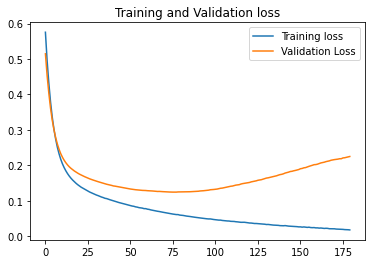

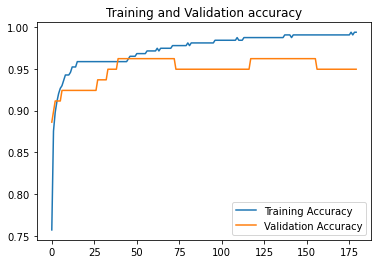

In [94]:
from keras import optimizers

# Dividere i dati in training set e validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(layers.GRU(64, input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

# optimizer = optimizers.Adam(learning_rate=0.001)  # Utilizzo dell'ottimizzatore Adam con un learning rate più basso
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=180, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

2 layers 

Epoch 1/180
40/40 [==============================] - 5s 37ms/step - loss: 0.7347 - accuracy: 0.2950 - val_loss: 0.7130 - val_accuracy: 0.4000
Epoch 2/180
40/40 [==============================] - 0s 6ms/step - loss: 0.7019 - accuracy: 0.4750 - val_loss: 0.6882 - val_accuracy: 0.6000
Epoch 3/180
40/40 [==============================] - 0s 6ms/step - loss: 0.6720 - accuracy: 0.6750 - val_loss: 0.6645 - val_accuracy: 0.7200
Epoch 4/180
40/40 [==============================] - 0s 7ms/step - loss: 0.6434 - accuracy: 0.7300 - val_loss: 0.6419 - val_accuracy: 0.7600
Epoch 5/180
40/40 [==============================] - 0s 7ms/step - loss: 0.6165 - accuracy: 0.8000 - val_loss: 0.6209 - val_accuracy: 0.8000
Epoch 6/180
40/40 [==============================] - 0s 7ms/step - loss: 0.5903 - accuracy: 0.8600 - val_loss: 0.6002 - val_accuracy: 0.8000
Epoch 7/180
40/40 [==============================] - 0s 6ms/step - loss: 0.5649 - accuracy: 0.8900 - val_loss: 0.5804 - val_accuracy: 0.8200
Epoch 8/180


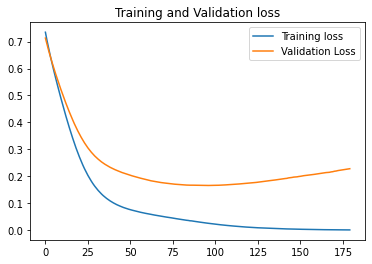

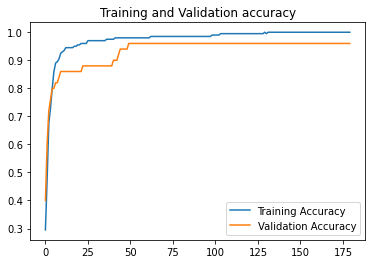

In [ ]:
from keras import optimizers

# Dividere i dati in training set e validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1]), return_sequences=True))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

#optimizer = optimizers.Adam(learning_rate=0.001) 
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=180, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()



1 layer + Dropout

Epoch 1/180
50/50 [==============================] - 3s 14ms/step - loss: 0.9038 - accuracy: 0.2520 - val_loss: 0.8852 - val_accuracy: 0.2698
Epoch 2/180
50/50 [==============================] - 0s 6ms/step - loss: 0.8207 - accuracy: 0.3320 - val_loss: 0.8396 - val_accuracy: 0.2857
Epoch 3/180
50/50 [==============================] - 0s 5ms/step - loss: 0.7861 - accuracy: 0.3760 - val_loss: 0.7973 - val_accuracy: 0.3651
Epoch 4/180
50/50 [==============================] - 0s 5ms/step - loss: 0.7709 - accuracy: 0.3800 - val_loss: 0.7570 - val_accuracy: 0.4127
Epoch 5/180
50/50 [==============================] - 0s 5ms/step - loss: 0.7104 - accuracy: 0.4840 - val_loss: 0.7186 - val_accuracy: 0.5079
Epoch 6/180
50/50 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.5800 - val_loss: 0.6832 - val_accuracy: 0.6667
Epoch 7/180
50/50 [==============================] - 0s 5ms/step - loss: 0.6444 - accuracy: 0.6680 - val_loss: 0.6499 - val_accuracy: 0.7143
Epoch 8/180


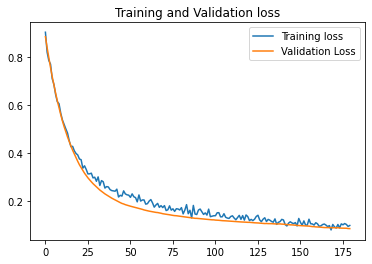

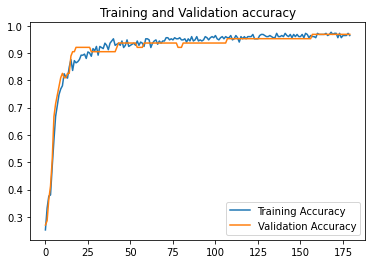

In [95]:
from keras import optimizers

# Dividere i dati in training set e validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

# optimizer = optimizers.Adam(learning_rate=0.001)  # Utilizzo dell'ottimizzatore Adam con un learning rate più basso
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=180, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

2 layers + Dropout

Epoch 1/180
32/32 [==============================] - 4s 28ms/step - loss: 0.6901 - accuracy: 0.5437 - val_loss: 0.6846 - val_accuracy: 0.7750
Epoch 2/180
32/32 [==============================] - 0s 8ms/step - loss: 0.6906 - accuracy: 0.5188 - val_loss: 0.6836 - val_accuracy: 0.7750
Epoch 3/180
32/32 [==============================] - 0s 8ms/step - loss: 0.6892 - accuracy: 0.5312 - val_loss: 0.6825 - val_accuracy: 0.7750
Epoch 4/180
32/32 [==============================] - 0s 7ms/step - loss: 0.6882 - accuracy: 0.5562 - val_loss: 0.6812 - val_accuracy: 0.7750
Epoch 5/180
32/32 [==============================] - 0s 7ms/step - loss: 0.6874 - accuracy: 0.5625 - val_loss: 0.6797 - val_accuracy: 0.7750
Epoch 6/180
32/32 [==============================] - 0s 7ms/step - loss: 0.6852 - accuracy: 0.5750 - val_loss: 0.6779 - val_accuracy: 0.8250
Epoch 7/180
32/32 [==============================] - 0s 7ms/step - loss: 0.6831 - accuracy: 0.6250 - val_loss: 0.6759 - val_accuracy: 0.8250
Epoch 8/180


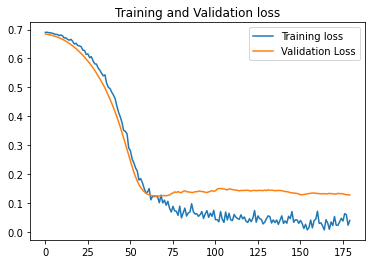

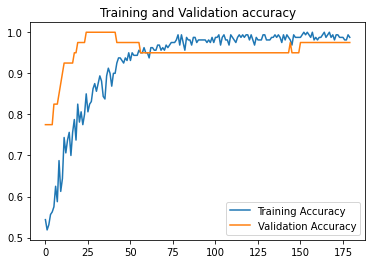

In [ ]:
from keras import optimizers

# Dividere i dati in training set e validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

#optimizer = optimizers.Adam(learning_rate=0.001) 
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=180, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

2 layers + 2 Dropout

Epoch 1/180
26/26 [==============================] - 4s 41ms/step - loss: 0.6624 - accuracy: 0.7734 - val_loss: 0.6383 - val_accuracy: 0.7812
Epoch 2/180
26/26 [==============================] - 1s 20ms/step - loss: 0.6260 - accuracy: 0.7891 - val_loss: 0.5875 - val_accuracy: 0.7812
Epoch 3/180
26/26 [==============================] - 1s 19ms/step - loss: 0.5259 - accuracy: 0.8828 - val_loss: 0.4576 - val_accuracy: 0.9062
Epoch 4/180
26/26 [==============================] - 0s 18ms/step - loss: 0.2672 - accuracy: 0.9531 - val_loss: 0.3468 - val_accuracy: 0.8438
Epoch 5/180
26/26 [==============================] - 0s 18ms/step - loss: 0.1631 - accuracy: 0.9453 - val_loss: 0.3385 - val_accuracy: 0.8750
Epoch 6/180
26/26 [==============================] - 0s 18ms/step - loss: 0.0680 - accuracy: 0.9844 - val_loss: 0.2685 - val_accuracy: 0.8750
Epoch 7/180
26/26 [==============================] - 0s 19ms/step - loss: 0.1321 - accuracy: 0.9609 - val_loss: 0.2641 - val_accuracy: 0.8750
Epoch 

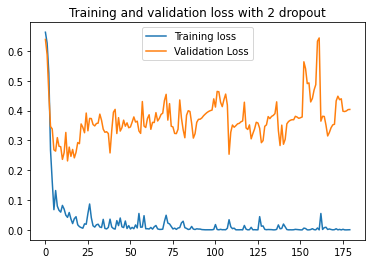

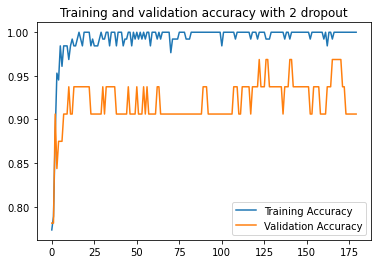

In [ ]:
from keras import optimizers
from sklearn.model_selection import train_test_split

# Dividere i dati in training set e validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(layers.GRU(64,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Dropout(0.3))  # Added dropout layer
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=5, epochs=180, validation_data=(x_val, y_val))



# Plotting
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))


plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss with 2 dropout')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and validation accuracy with 2 dropout')
plt.legend()
plt.show()


Early stopping + validation

Epoch 1/100
10/10 [==============================] - 8s 190ms/step - loss: 0.6925 - accuracy: 0.4665 - val_loss: 0.6916 - val_accuracy: 0.6076
Epoch 2/100
10/10 [==============================] - 0s 45ms/step - loss: 0.6890 - accuracy: 0.6518 - val_loss: 0.6866 - val_accuracy: 0.6582
Epoch 3/100
10/10 [==============================] - 0s 45ms/step - loss: 0.6780 - accuracy: 0.7412 - val_loss: 0.6731 - val_accuracy: 0.7595
Epoch 4/100
10/10 [==============================] - 0s 44ms/step - loss: 0.6590 - accuracy: 0.7732 - val_loss: 0.6393 - val_accuracy: 0.8481
Epoch 5/100
10/10 [==============================] - 0s 44ms/step - loss: 0.6117 - accuracy: 0.8147 - val_loss: 0.5548 - val_accuracy: 0.8608
Epoch 6/100
10/10 [==============================] - 0s 51ms/step - loss: 0.4545 - accuracy: 0.9042 - val_loss: 0.3178 - val_accuracy: 0.9114
Epoch 7/100
10/10 [==============================] - 0s 46ms/step - loss: 0.2281 - accuracy: 0.9393 - val_loss: 0.2406 - val_accuracy: 0.9367
Epoch

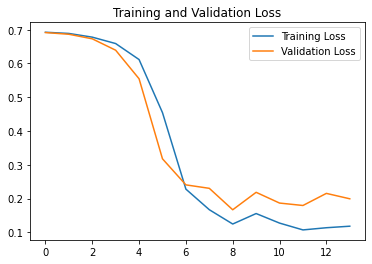

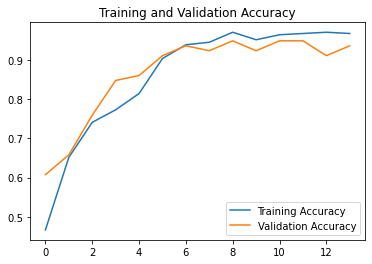

In [ ]:
from keras import optimizers
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import GRU, Reshape, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Definizione del modello
model = Sequential()
model.add(GRU(64,
              dropout=0.2,
              recurrent_dropout=0.2,
              input_shape=(None, x_train.shape[-1])))
model.add(Reshape((model.output_shape[1], 1)))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)

# Addestramento con early stopping
history4 = model.fit(x_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])

# Plot dell'andamento della loss e dell'accuracy
loss = history4.history['loss']
val_loss = history4.history['val_loss']
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()



K FOLD

Average Training Loss: 0.10775990085676312
Average Training Accuracy: 0.9839999973773956
Average Validation Loss: 0.21052378043532372
Average Validation Accuracy: 0.9320000112056732


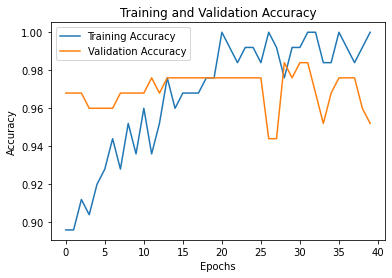

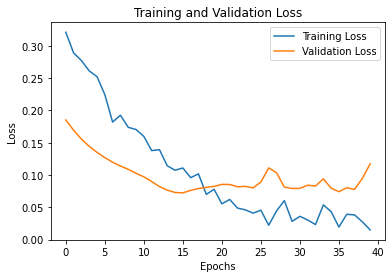

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras import optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Definizione del modello
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.15,
                     recurrent_dropout=0.15,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilazione del modello
optimizer = optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Definizione del k-fold cross-validation
k = 2
  # Numero di fold
kf = KFold(n_splits=k, shuffle=True)

# Liste per salvare le metriche di ogni fold
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Esecuzione del k-fold cross-validation
for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Addestramento del modello sul fold corrente
    history = model.fit(x_train_fold, y_train_fold, epochs=40, validation_data=(x_val_fold, y_val_fold), verbose=0)
    
    # Calcolo delle metriche sul fold corrente
    train_loss, train_acc = model.evaluate(x_train_fold, y_train_fold, verbose=0)
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    
    # Salvataggio delle metriche
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

# Calcolo delle medie delle metriche dei fold
avg_train_loss = sum(train_losses) / k
avg_train_acc = sum(train_accs) / k
avg_val_loss = sum(val_losses) / k
avg_val_acc = sum(val_accs) / k

# Stampa delle metriche medie
print("Average Training Loss:", avg_train_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Loss:", avg_val_loss)
print("Average Validation Accuracy:", avg_val_acc)

# Primo grafico - Training e Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Secondo grafico - Training e Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.tight_layout()  # Per evitare sovrapposizione di assi e titoli
plt.show()

kfold + test

Average Training Loss: 0.20781814058621725
Average Training Accuracy: 0.9659476280212402
Average Validation Loss: 0.24783137192328772
Average Validation Accuracy: 0.9560623367627462


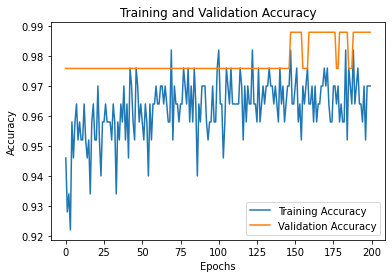

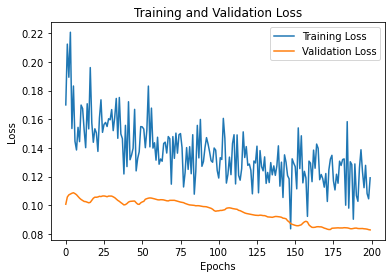

<Figure size 432x288 with 0 Axes>

6/6 [==============================] - 0s 4ms/step - loss: 0.1110 - accuracy: 0.9762
Test Loss: 0.11103323847055435
Test Accuracy: 0.976190447807312


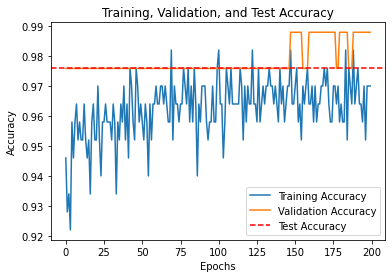

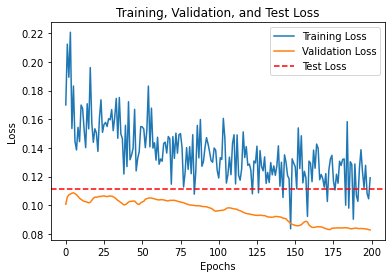

In [ ]:
from keras import optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Definizione del modello
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.20,
                     recurrent_dropout=0.15,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilazione del modello
optimizer = optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Definizione del k-fold cross-validation
k = 3
  # Numero di fold
kf = KFold(n_splits=k, shuffle=True)

# Liste per salvare le metriche di ogni fold
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Esecuzione del k-fold cross-validation
for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Addestramento del modello sul fold corrente
    history = model.fit(x_train_fold, y_train_fold, epochs=200, validation_data=(x_val_fold, y_val_fold), verbose=0)
    
    # Calcolo delle metriche sul fold corrente
    train_loss, train_acc = model.evaluate(x_train_fold, y_train_fold, verbose=0)
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    
    # Salvataggio delle metriche
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

# Calcolo delle medie delle metriche dei fold
avg_train_loss = sum(train_losses) / k
avg_train_acc = sum(train_accs) / k
avg_val_loss = sum(val_losses) / k
avg_val_acc = sum(val_accs) / k

# Stampa delle metriche medie
print("Average Training Loss:", avg_train_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Loss:", avg_val_loss)
print("Average Validation Accuracy:", avg_val_acc)

# Primo grafico - Training e Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Secondo grafico - Training e Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.tight_layout()  # Per evitare sovrapposizione di assi e titoli
plt.show()

# Valutazione del modello sui dati di test
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Grafico - Test Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Grafico - Test Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

LSTM 

In [ ]:
lstm_units = 128
dense_units = 32  

CompleteLSTM(x_train, x_test, y_train, y_test, results, ft, kf, perfInd, epochs, batch, lstm_units, dense_units, dropout_percentage, loss_function, metric)